In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.FuzzyOperations import de_A, u_A

1. La planta

2. Controlador (CLD)

Se definen los valores difusos y las reglas difusas.

In [17]:
# Valores difusos trapezoidales
# TODO dejar la implementacion que quede más simple de usar

Fuzzy_Values = {
    "Ng" : (-1.0, -1.0, -0.8, -0.6),
    "Nm" : (-0.8, -0.6, -0.4, -0.2),
    "Np" : (-0.5, -0.4, -0.2, -0.1),
    "Ni" : (-0.2, -0.1, 0.0, 0.0),
    "Ce" : (-0.1, 0.0, 0.0, 0.1),
    "Pi" : (0.0, 0.0, 0.1, 0.2),
    "Pp" : (0.1, 0.2, 0.4, 0.5),
    "Pm" : (0.4, 0.4, 0.6, 0.8),
    "Pg" : (0.6, 0.8, 1.0, 1.0)
}

In [18]:
# Se definen conjuntos de_A necesarios
All_Fuzzy_Values = Fuzzy_Values.copy()
All_Fuzzy_Values["de_A_Ng_Pp"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Pp"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Ng_Np"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Np"])
All_Fuzzy_Values["de_A_Np_Pi"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Pm_Pg"] = de_A(Fuzzy_Values["Pm"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Np_Pg"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Pp_Pg"] = de_A(Fuzzy_Values["Pp"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])

In [22]:
# Mapa de reglas en base a 2 variables difusas: EP y TP. Salida es deltaH.
mapa_reglas = {}

# Regla 1
mapa_reglas[(All_Fuzzy_Values["Ng"], All_Fuzzy_Values["de_A_Ng_Pp"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 2
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Nm"], All_Fuzzy_Values["de_A_Ng_Np"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 3
mapa_reglas[(All_Fuzzy_Values["Np"], All_Fuzzy_Values["de_A_Np_Pi"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 4
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 5
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 6
mapa_reglas[(All_Fuzzy_Values["de_A_Ni_Pi"], All_Fuzzy_Values["Ce"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 7
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 8
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 9
mapa_reglas[(All_Fuzzy_Values["Pp"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 10
mapa_reglas[(All_Fuzzy_Values["de_A_Pm_Pg"], All_Fuzzy_Values["de_A_Pp_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 11
mapa_reglas[(All_Fuzzy_Values["Pg"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas), end=", ")
# Regla 12
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 13
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 14
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 15
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 16
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Np"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 17
mapa_reglas[(All_Fuzzy_Values["de_A_Pp_Pg"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas))

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17


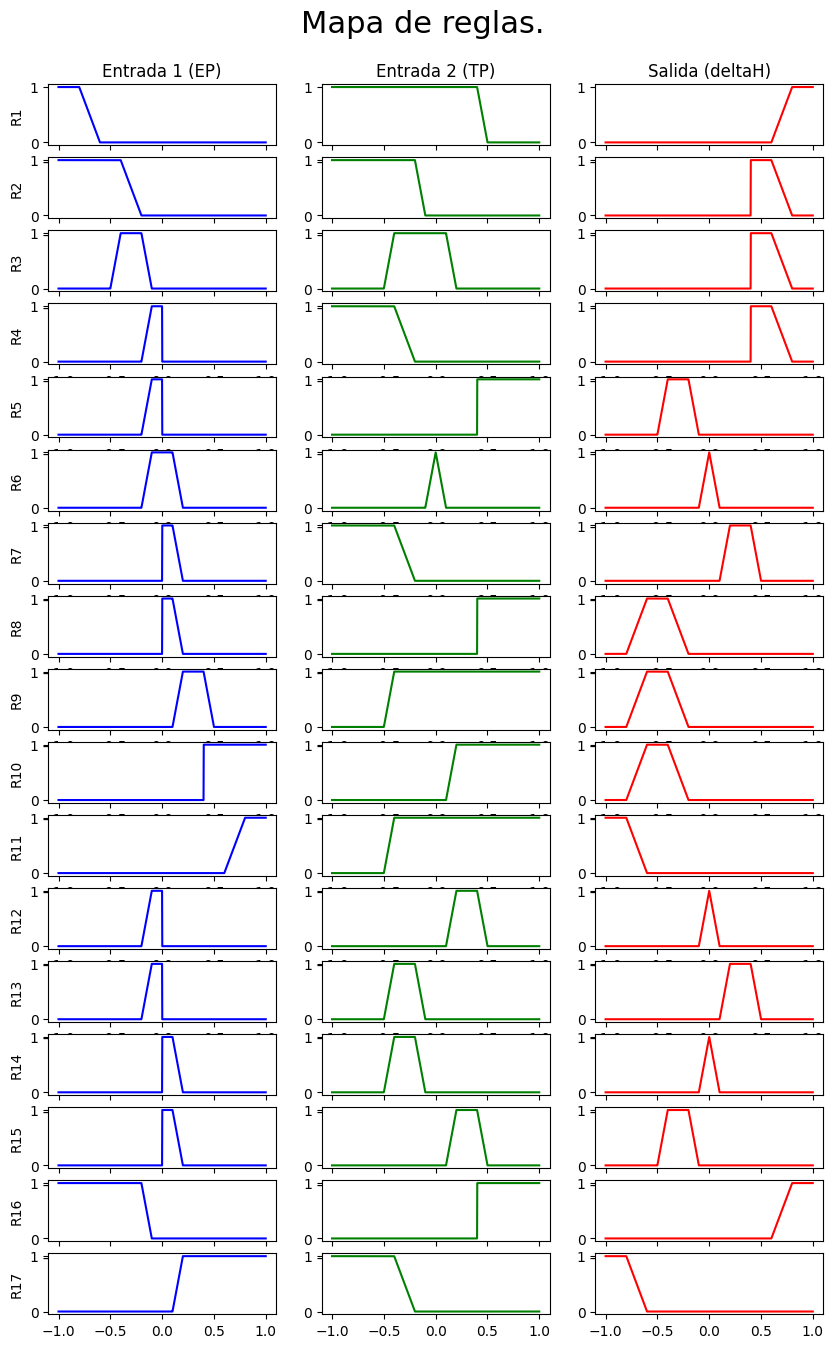

In [23]:
# Gráfico de reglas difusas
dominio = np.linspace(-1, 1, 2000)
grafico_conjunto = lambda C: np.array(list(map(lambda x: u_A(C, x), dominio)))

fig, ax = plt.subplots(nrows=17, ncols=3, figsize=(10,15))
for i, (A, B) in enumerate(mapa_reglas.keys()):
    ax[i, 0].set_ylabel(f"R{i+1}")
    ax[i, 0].plot(dominio, grafico_conjunto(A), color="b")
    ax[i, 1].plot(dominio, grafico_conjunto(B), color="g")
    ax[i, 2].plot(dominio, grafico_conjunto(mapa_reglas[(A, B)]), color="r")

ax[0,0].set_title("Entrada 1 (EP)")
ax[0,1].set_title("Entrada 2 (TP)")
ax[0,2].set_title("Salida (deltaH)")

plt.subplots_adjust(top=0.93)  # Parámetro que hace que se vea bien
plt.suptitle("Mapa de reglas.", fontsize=22)

plt.show()


2. Controlador CLD

3. Parámetros de simulación